# 3D BCS: $T=0$ and balanced case ($N_\uparrow = N_\downarrow$)

In [3]:
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 

In [40]:
def integrate_k2dk(f_integrand,kcut=np.inf,args=()):
    # quad return a tuple: (value, error estimate)
    import scipy.integrate as integrate
    def k2integrand(k,args=args):
        return k**2*f_integrand(k,*args)
    #print( k2integrand(2.1,args=args) )
    return integrate.quad(k2integrand,0,kcut,args=(args,),limit=100)
    #return integrate.quad(k2integrand,0,1000,args=(args,),points=[1,2])

def ϵk(k):
    return k**2

def ξk(k,μ):
    return ϵk(k)-μ

def Ek(k,μ,Δ):
    return np.sqrt(ξk(k,μ)**2+Δ**2)
    
def vk2(k,μ,Δ):
    return 0.5*(1-ξk(k,μ)/Ek(k,μ,Δ))

def calc_density(μ,Δ,kcut=np.inf):
    return integrate_k2dk(vk2,kcut=kcut,args=(μ,Δ))[0]/np.pi**2

def number_equation(μ,Δ,kcut=np.inf):
    return 1./(3*np.pi**2)-calc_density(μ,Δ,kcut=kcut)

def solve_number(μ0,Δ,as_inv,kcut=np.inf):
    from scipy.optimize import fsolve
    return fsolve(number_equation,x0=μ0,args=(Δ,kcut))[0]

def gap_integrand(k,μ,Δ):
    return (1./Ek(k,μ,Δ)-1./ϵk(k))

def gap_equation(Δ,μ,as_inv,kcut=np.inf):
    return as_inv+2./np.pi*integrate_k2dk(gap_integrand,kcut=kcut,args=(μ,Δ))[0]

def solve_gap(Δ0,μ,as_inv,kcut=np.inf):
    from scipy.optimize import fsolve
    return fsolve(gap_equation,x0=Δ0,args=(μ,as_inv,kcut))[0]

def gap_and_number_equations(x,as_inv,kcut=np.inf):
    Δ=x[0]
    μ=x[1]
    return [gap_equation(Δ,μ,as_inv,kcut), number_equation(μ,Δ,kcut)]

def solve_gap_and_number(Δ0,μ0,as_inv,kcut=np.inf):
    from scipy.optimize import root
    return root(gap_and_number_equations,[Δ0,μ0],args=(as_inv,kcut))

def solve_number_and_gap0(as_inv,μ0,Δ0):
    from scipy.optimize import fsolve
    def number_eq_delta(μ,as_inv,Δ0):
        Δ=solve_gap(μ,as_inv,Δ0)
        return number_equation(μ,Δ)
    #return number_eq_delta(0.9,as_inv)
    return fsolve(number_eq_delta,x0=μ0,args=(as_inv,Δ0))[0]

def solve_number_and_gap2(as_inv,μ0,Δ0):
    import scipy.optimize
    def number_eq_delta(μ,as_inv,Δ0):
        Δ=solve_gap(μ,as_inv,Δ0)
        return number_equation(μ,Δ)
    #return number_eq_delta(0.9,as_inv)
    #return scipy.optimize.root(number_eq_delta,x0=μ0,args=(as_inv,Δ0),tol=1e-12, method='broyden2')
    #return scipy.optimize.newton(number_eq_delta,x0=μ0,args=(as_inv,Δ0))
    #return scipy.optimize.brentq(number_eq_delta,-10,-3,args=(as_inv,Δ0))


# Plot number and gap integrals

In [41]:
#as_inv=-2
#μ0=0.9
#Δ0=0.1

as_inv=2
μ0=-3.9
Δ0=2.1
kk=np.logspace(-2,5,1000)

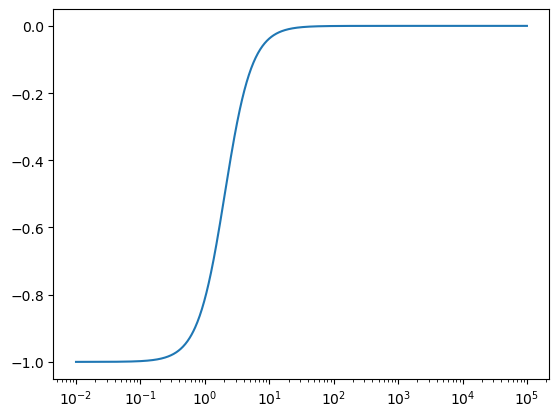

In [42]:
plt.semilogx(kk,kk**2*gap_integrand(kk,μ0,Δ0))
#plt.yscale('symlog')

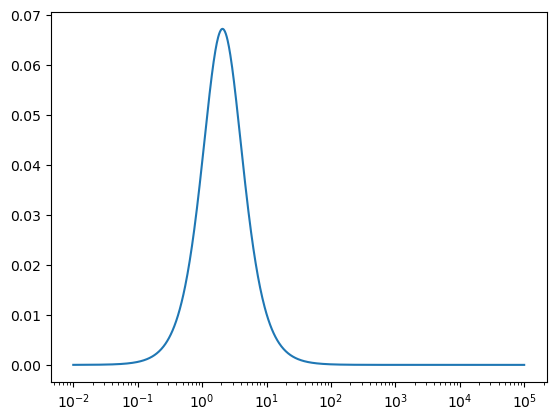

In [43]:
plt.semilogx(kk,kk**2*vk2(kk,μ0,Δ0))
#plt.yscale('symlog')

# Check root finding

In [44]:
# check root finding for gap and number equations separately

kcut=100

as_inv=-2
μ0=0.9
Δ0=0.1

#as_inv=2
#μ0=-3.9
#Δ0=2.1

print(Δ0,gap_equation(Δ0,μ0,as_inv,kcut))
Δ=solve_gap(Δ0,μ0,as_inv,kcut)
print(Δ,gap_equation(Δ,μ0,as_inv,kcut))

print(μ0,number_equation(μ0,Δ0,kcut))
μ=solve_number(μ0,Δ0,as_inv,kcut)
print(μ,number_equation(μ,Δ0,kcut))

0.1 -0.6292126775125628
0.035206575261643634 0.0
0.9 0.004302490488361659
0.9877702100437008 -3.492345301836508e-14


In [45]:
# test gap and number solver: solving both equations together becomes important in the BEC limit, otherwise the solution oscillates...

# limits

#as_inv=-2
#μ0=0.9
#Δ0=0.1

as_inv=2
μ0=-3.9
Δ0=2.1

solve_gap_and_number(Δ0,μ0,as_inv,kcut)

 message: The solution converged.
 success: True
  status: 1
     fun: [ 1.334e-13  3.010e-13]
       x: [ 1.885e+00 -3.996e+00]
    nfev: 8
    fjac: [[-6.061e-01 -7.954e-01]
           [ 7.954e-01 -6.061e-01]]
       r: [ 4.415e-02 -1.443e-01  1.897e-01]
     qtf: [ 1.055e-10  7.861e-13]

In [46]:
print(gap_equation(Δ0,μ0,as_inv),number_equation(μ0,Δ0,kcut))
μ=solve_number_and_gap0(as_inv,μ0,Δ0)
Δ=solve_gap(Δ0,μ,as_inv,kcut)
print(Δ,μ)
print(gap_equation(Δ,μ,as_inv,kcut),number_equation(μ,Δ,kcut))

sol = solve_number_and_gap2(as_inv,μ0,Δ0)

#print(gap_equation(Δ,sol,as_inv),number_equation(sol,Δ))

-0.008462811884940802 -0.008439226624418837


/tmp/ipykernel_122753/761042329.py:7: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(k2integrand,0,kcut,args=(args,),limit=100)
/tmp/ipykernel_122753/761042329.py:7: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(k2integrand,0,kcut,args=(args,),limit=100)


0.4593750000000001 -47853.63678809761
-57.712027627262955 0.03377310902985297


# Make a plot of $\Delta$ and $\mu$ across the BCS-BEC crossover

In [53]:
%%time 

kcut=10

μlists=[]
Δlists=[]

as_inv_list=np.linspace(-2,2,41)

for kcut in [100]:

    μ0=0.9
    Δ0=0.1
    μlist=[]
    Δlist=[]
    for as_inv in as_inv_list:
        #print(as_inv)
        #μ0=solve_number_and_gap(as_inv,μ0=μ0,Δ0=Δ0)
        #Δ0=solve_gap(Δ0,μ0,as_inv)
        #for i in range(20):
        #    Δ0=solve_gap(Δ0,μ0,as_inv)
        #    μ0=solve_number(μ0,Δ0,as_inv)
        #print(Δ0,μ0)
        sol=solve_gap_and_number(Δ0,μ0,as_inv,kcut)

        if sol['status']==1 : 
        
            Δ0=sol.x[0]
            μ0=sol.x[1]
    
            μlist.append(μ0)
            Δlist.append(Δ0)
        
    μlists.append(μlist)
    Δlists.append(Δlist)

CPU times: user 1.48 s, sys: 21 µs, total: 1.48 s
Wall time: 1.48 s


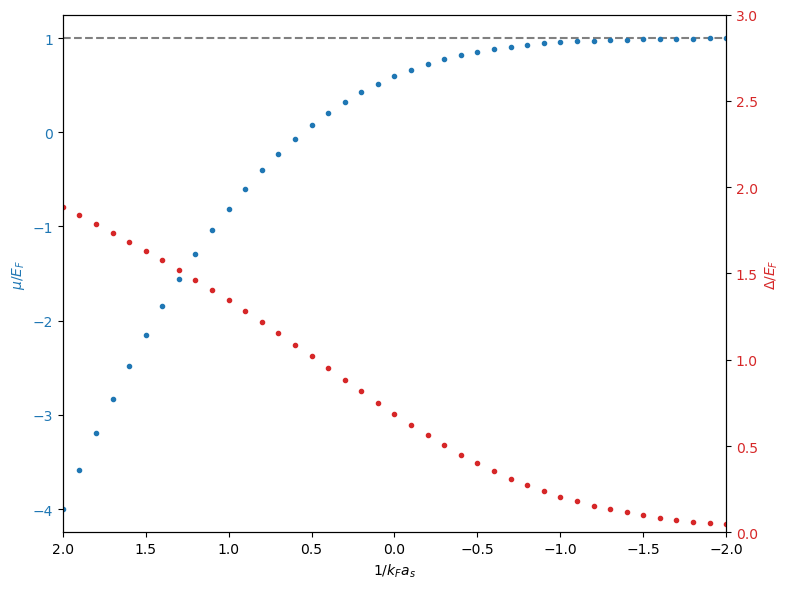

In [55]:
fig, ax1 = plt.subplots(figsize=(8,6))

symbols=['.', '+', 'x']

for ix, [μlist, Δlist] in enumerate(zip(μlists,Δlists)):

    color = 'tab:blue'
    ax1.set_xlabel(r"$1/k_Fa_s$")
    ax1.axhline(1,ls="--",c='grey')
    ax1.set_ylabel(r"$\mu/E_F$", color=color)
    ax1.plot(as_inv_list, μlist, marker=symbols[ix], linestyle = 'None', color=color)
    #ax1.plot(μlist, marker=symbols[ix], linestyle = 'None', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xlim([np.max(as_inv_list),np.min(as_inv_list)])

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel(r"$\Delta/E_F$", color=color)  # we already handled the x-label with ax1
    ax2.plot(as_inv_list,np.abs(Δlist), marker=symbols[ix], linestyle = 'None', color=color)
    #ax2.plot(np.abs(Δlist), marker=symbols[ix], linestyle = 'None', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim([0,3])

fig.tight_layout();  # otherwise the right y-label is slightly clipped

c:\users\lenovo\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


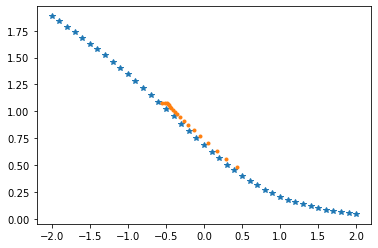

In [19]:
plt.plot(-as_inv_list,Δlist,marker='*', linestyle = 'None')
plt.plot(np.array([-0.54776155, -0.50998489, -0.48896902, -0.47750289, -0.46582395,
       -0.45135037, -0.43373826, -0.41233412, -0.38622594, -0.35502292,
       -0.31590669, -0.26748401, -0.20839383, -0.13571521, -0.04893513,
        0.05260049,  0.16793442,  0.29451276,  0.43018115]),np.array([1.08050072+0.j, 1.08050072+0.j, 1.07510132+0.j, 1.06562441+0.j,
       1.05462631+0.j, 1.04253047+0.j, 1.02891064+0.j, 1.01327621+0.j,
       0.99501472+0.j, 0.97270648+0.j, 0.94622408+0.j, 0.91423369+0.j,
       0.87433217+0.j, 0.82765764+0.j, 0.77158625+0.j, 0.70627389+0.j,
       0.63488026+0.j, 0.56137571+0.j, 0.4848995 +0.j]),marker='.', linestyle = 'None')